# Acute Stroke Unit Simulation

## 1) Executive Summary

### 1.1) Aims
This project aims to help an NHS trust in capacity planning for an acute stroke unit using discrete event simulation. In doing so, we will be answering two principle questions:
- Bed capacity needed for 90% of patients to be admitted within 4 hours of arrival (annually).
- If a 90% performance with a bed utilization of more than 70% can be achieved and maintained.

### 1.2) Methodology
We have first simulated a basic model with 9 beds and no increase in admission using multiple replications, and then verified the model. We first used randomization to pick the most suitable warm-up period and confirmed our results using graphs. Then, we used the confidence interval method to choose the optimal number of replications. 

Afterwards, we ran two scenarios. For our first scenario, we changed the *number of beds* and observed the change in the percentage of patient admittance with 4 hours of arrival (A4A), and the trade-off between performance and bed utilization.
For our second scenario, we modelled a 5, 10, 15, and 20 percent increase in patients requiring admission. We then applied more complexity to our model via patient prioritisation, and conducted a sensitivity analysis for our inputs to see the degree of impact of two additional minor scenarios.

For verification, we calculated the parameters *length of stay, arrival rate, and percentage of increase* to see if they were consistent with the specifications given by the NHS and followed the correct distribution. We also checked to see if our results were consistent with a similar existing model [1].

### 1.3) Results
The results of our verification showed that our model preformed as expected. Regarding our model results, we found that it is not possible to maintain both a 70% bed utilization and a performance of 90% at the same time. 

Our baseline model with 9 beds and no increase in arrival rates gave us a performance of 65% and a bed utilization of 78%. The bed capacity needed for 90% of patients to be admitted within 4 hours is 11 beds (64% bed utilization), and if there is an 10% increase in arrival rates, 12 beds (65% bed utilization). If there are 14 beds, almost all patients will be admitted within less than 4 hours of arrival, even with a 20% increase in admittance, but this comes at the price of bed utilization (50% - 60%).


### 1.4) Conclusion
Considering that the safari rounds have not been taken into consideration and would likely affect the performance and bed utilisation, we can consider our modelling results to be slightly conservative. Meanwhile, considering the effect of the additional scenarios, our results could also be considered as slightly optimistic, thereby balancing out. As such, with consideration to the impossibility of achieving both a 90% performance and 70% bed utilisation, we would suggest the use of 11 beds as an efficient trade off. It is possible to achieve a 90% admittance rate with 11 beds, and in the event of an increase in arrival rates, the achieved admittance rate will still be relatively high while the bed utilisation will become the desired 70%.

## 2) Planned Analyses

Our model follows the schematic below, with the random arrivals following an *exponential* distribution, and the length of stay following a *log normal* distribution. For our queuing discipline, we assumed a *first come, first served* principle initially and checked for a difference in outcome for a prioritized patient principle. Moreover, we assumed that the patients will wait indefinitely. As there is a lack of reliable data on the destination of patients, this was not taken into consideration for our model.

To see the change in results by changing input parameters, use the terminal and run the following command:<br>
```streamlit run Interactive_Simulation.py```<br>
You can then open the given URL onto a Streamlit compatible browser such as chrome and view different options.

| ![schem](./process.png) |
|:--:| 
| *Acute stroke unit schematic* |

<sub> 
IAT = Inter arrival time <br>
LOS = Length of stay
</sub>

### Libraries used
- pandas v-1.5.2
- numpy v-1.24.1
- matplotlib v-3.6.2
- seaborn v-0.12.2
- simpy v-4.0.1
- scipy v-1.10.0
- streamlit v-1.16.0
- joblib v-1.2.0
- jupyterlab v-3.0.8

All code was written using Python 3

In [1]:
# Imports
from Hospital import acutestrokeunit, interface, distributions;
import matplotlib.pyplot as plt

# Use this style for all plots
plt.style.use('ggplot')

### 2.1) Warm-up Period
The minimum **warm up period** was calculated using a randomization test [2], which tests the null hypothesis of there being no significant change in the mean of the process throughout the run. The exact warm-up period was then chosen based on the graph with consideration the randomization results.

We initially set the default values for our variables as 5 years (arbitrary large number) for the result collection period, 10 repetitions (a default value that is commonly used), a warm-up period of 0, and an audit interval of 5 days. We then proceeded to calculate the optimal warm-up period using these parameters. We first used the randomization test to automate the warm-up period calculations. From the results for the two end-points (one for each metric), we chose 50, which is the larger one. The graph below visualises our results and helps us confirm our output. 
Based on the graph, we can see that the end-points become more stable after a wait time of 50 (green line) as well, as such, we have chosen 250 (5*50) days as our wait time with consideration to the audit interval.


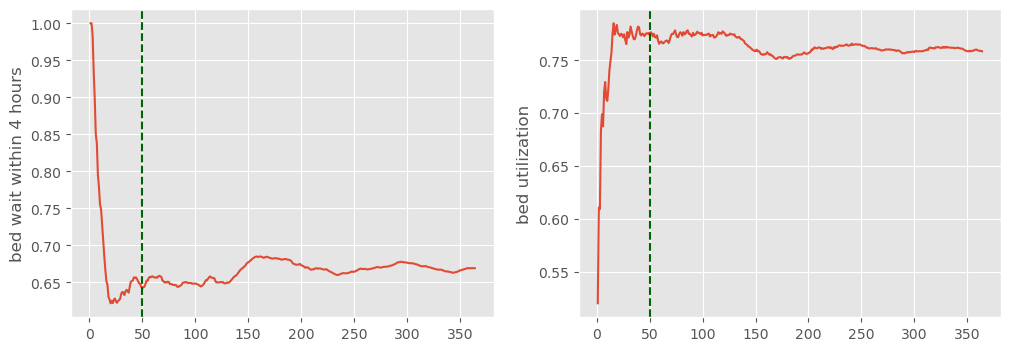

. . . . . . .
The warmup period for bed utilization is 50
. .
The warmup period for admittance within 4 hours of arrival is 1


In [2]:
interface.get_warmup()

### 2.2) Number of Replications
To calculate the optimal number of replications, we first set our wait time to the chosen amount of 250 and set the default number of replications to 100. We then use the confidence interval method [3] to find the minimum number of replications within the range of 50 to 100 that gives us a confidence interval with a width of 5% or less. Our graph below shows our results. As can be seen, we have chosen 65 as our number of replications.


Analysis of replications for beds utilization...

minimum number of reps for 5% precision: 51

Analysis of replications for admittance within 4 hours...

minimum number of reps for 5% precision: 65



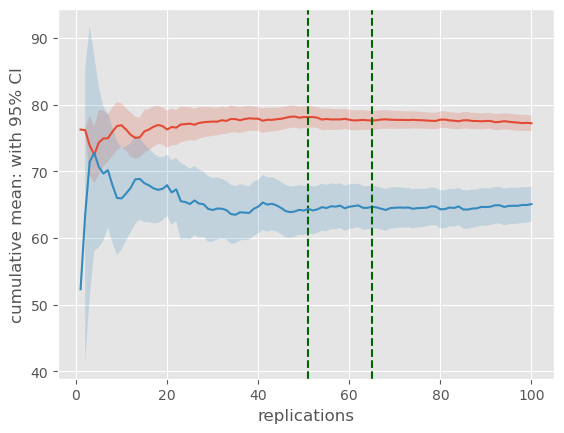

In [3]:
interface.rep_num()

### 2.3) What-if Scenarios
We have considered two scenarios for our mode. For scenario A, we changed the number of beds and observed the difference in bed utilization and admittance within 4 hours of arrival, and for scenario B, we have checked the effect of an increase in patient admittance.

From the graphs below, we can see that the NHS assumption of *patient admittance within 4 hours in the base scenario being less than 80%* is indeed correct.


#### 2.3.1) Scenario A 
For our first scenario, we have increase the bed number, from our baseline at 9 to 14 beds, which lead to a consistent observable decline in bed utilization. The increase in bed numbers initially had a large effect on patient wait times but gradually became less significant and by 14 beds, had little to no effect depending on the admission rate.

#### 2.3.2) Scenario B
The second scenario is focused on an increase in admittance rate from a 0% baseline to 20%, with 10% being a point of interest for the NHS. The percentage of increase initially has a significant effect on the A4A but becomes less noticeably significant as the number of beds increase. The effect of rate increase on the mean bed utilization also declines with an increase in the number of beds, but less so, remaining significant.


Scenario analysis complete.


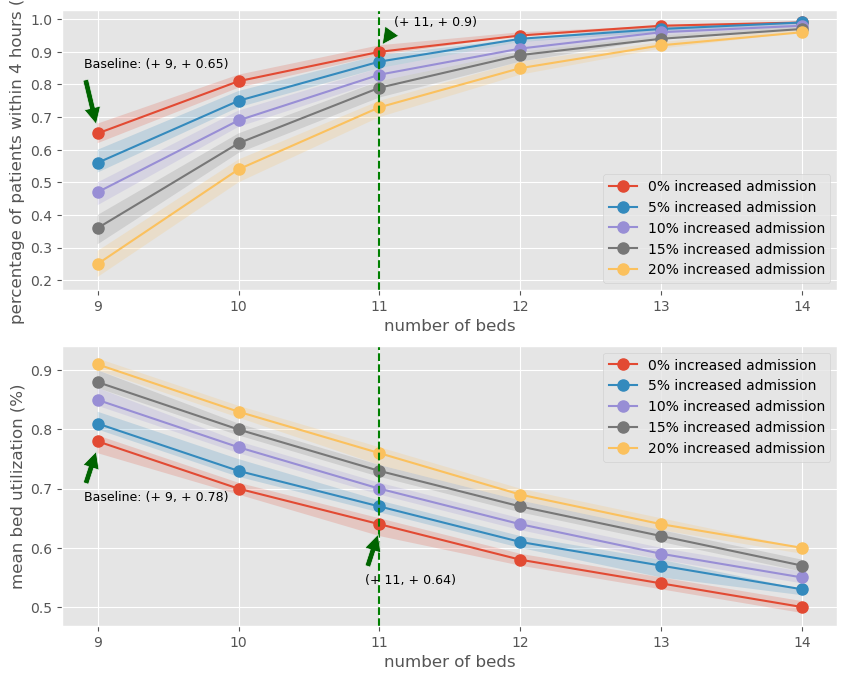

In [4]:
scenarios = interface.get_scen()
scenarios.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
scenarios.set_index('Index', inplace=True)

interface.plot_summary(scenarios)

### 2.4) Sensitivity Analysis

#### 2.4.1) Patient priority and length of stay

In our model, the length of stay distribution of the patients are assumed to be consistent, however, in real life the length of stay could be slightly altered by several unaccounted for factors related to resources. For example, in our first scenario, if the number of beds increase but the number of workers (nurses, doctor, ...) or necessary devices remain the same, the length of stay would be longer than our estimate. Similarly, the length of stay of a patient whose destination is another ward or hospital would depend on the resources of that destination.

To confirm that these minor differences won't cause a major shift in our results, we have conducted a sensitivity analysis on the length of stay which shows a low sensitivity and thus gives us more confidence that our results, while slightly optimistic, are reliable. 

Additionally, we have conducted a similar analysis for our queuing discipline, giving stroke patients the highest priority and patients with a complex neurological condition the lowest priority. Our analysis shows that the change in patient priority does not alter our results significantly and can be done without worry.

#### 2.4.2) Unaccounted Deaths

The death rate of patients who made it to the treatment unit were considered in the average length of stay, but the patients who dies before admittance were not. As the patients who died on the path to the treatment section were not accounted for in the dataset from which our numbers were derived, they were not considered as a part of our simulation. However, these patients would still exist and take up space, so we have conducted a sensitivity analysis to see how an increase in arrival rates would affect our results. 

The tornado plot below shows that while a change in arrival rate won't significantly alter the bed utilization, it might have a major effect on patient admittance. This, however, is for the patients who stay in the ward. As the dead patients have not made it to the ward, we must take both the length of stay and arrival rate into consideration at the same time, thereby lessening the effect of the arrival rate significantly.


Scenario analysis complete.
Scenario analysis complete.
Scenario analysis complete.
Scenario analysis complete.


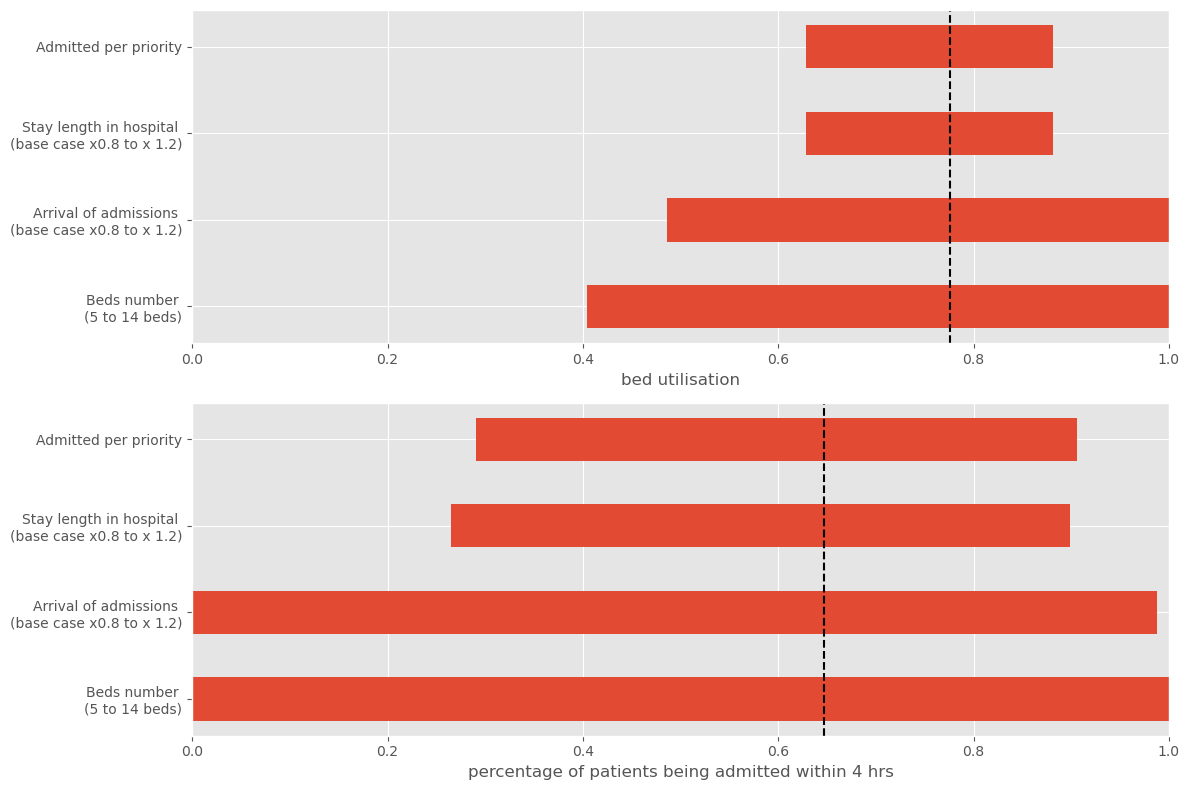

In [5]:
interface.sensitivity()

### 2.5) Verification
The verification steps are held in a separate jupyter notebook entitled **verification.ipynb**.
The results show that the model preforms as expected and the distributions and parameters are indeed correct. Our outputs were also consistent with an existing paper with a similar premise [1].


## 3) Findings
Our findings show that by **14** beds, even if there is a **20%** increase in admissions, more than **90%** of patients will have a wait time of less than 4 hours, however, the bed utilization will be at most **~60%**. For our baseline of **9** beds and **0%** increase in admissions, we have a bed utilization of **78%** but only **65%** of patients wait for 4 hours or less. We get to more than a **90%** A4A (without an increase in admission rates) when we have a bed number of **11**. This, however, puts our bed utilization at **64%**. After a **10%** increase in admission rates, we see that the A4A will reach **90%** at **12** beds, however, the bed utilization continues to be less than **70%**. After the number of beds reaches **13**, even after a **20%** increase in patients, more than **90%** will wait for 4 hours or less but the bed utilization will fall within the **50-60%** range.
From this, we can conclude that it is **not possible** to achieve both a ***90% addition rate*** and ***70% bed utilization*** at the same time.


## 4) Conclusions

We have found that it is not possible to have both an admission rate of 90% and bed utilization of 70% at the same time. We can have an average of 90% admittance within 4 hours of arrival if we have 11 bed for 0% increase in admission rates and 12 beds for a 10% increase. Both cases would put bed utilization at ~65%, however, if bed utilization is more important than the admission rate, 10 beds (no increase in admission)/11 beds (10% increase in admission) would give an average of 70% bed utilization, but this would put the admission rate at ~80%. We suggest **11 beds** as it serves as a good trade-off in both the case of no increase and a 10% increase in patient admittance.

A limitation of our analysis is that we have assumed that the distribution of the length of stay is consistent however, as previously mentioned, this may not always be the case in real life. We have also not taken the *safari rounds* that are conducted in hospitals into consideration, which could have an effect on our results (if beds are empty patients from other wards may use the beds in this unit, and if there are not any beds, patients from this ward can use beds in other empty wards for these rounds), although the extent is unlikely to significantly alter the results. 

Overall, our results could be considered as somewhat conservative regarding the lack of safari rounds, and somewhat optimistic relating to the additional scenarios. This shows that our results can be considered as balanced, and confirms our recommendation of 11 beds. 


## References
1) Monks T, Worthington D, Allen M, Pitt M, Stein K, James MA. "A modelling tool for capacity planning in acute and community stroke services". BMC health services research. 2016 Dec;16(1):1-8.

2) P. S. Mahajan and R. G. Ingalls, "Evaluation of methods used to detect warm-up period in steady state simulation," Proceedings of the 2004 Winter Simulation Conference, 2004., Washington, DC, USA, 2004, pp. 671, doi: 10.1109/WSC.2004.1371374.

3) K. Hoad, S. Robinson and R. Davies, "Automating des output analysis: How many replications to run," 2007 Winter Simulation Conference, Washington, DC, USA, 2007, pp. 505-512, doi: 10.1109/WSC.2007.4419641.

